In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

In [ ]:
import matplotlib.pyplot as plt

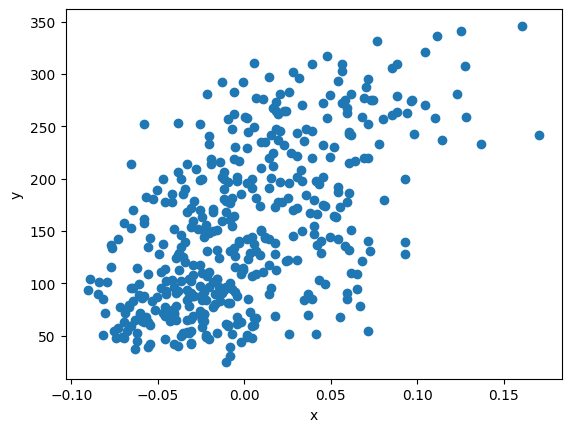

In [ ]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target

# 경사하강법
1. 무작위로 w와 b를 정함
2. x에서 샘플 하나를 선택하여 $$\hat{y}$$를 계산(무작위 모델 예측)
3. $$\hat{y}$$과 선택한 진짜 y 비교
4. $$\hat{y}$$이 y와 가까워지도록 w, b 재조정
5. 모든 샘플 처리할 때까지 반복

In [ ]:
w = 1.0
b = 1.0

In [ ]:
y_hat = x[0]*w+b
print(y_hat)

1.0616962065186832


In [ ]:
print(y[0])

151.0


y값 조절하여 예측값 변경

In [ ]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


w값 조정한 후 예측값 증가 정도 확인

In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


근데 사실상, 이 예측값 증가 정도를 훈련 데이터 x[0]에 대한 w의 변화율이라고 했을때
w_rate에 대한 코드를 수식으로 정리하면 변화율은 결국 훈련 데이터의 x[0]과 같음

y_hat의 값은 y보다 작기 때문에 y_hat을 증가시키려면 이때의 변화율은 양수이므로 w 값을 증가시키면 y_hat의 값도 증가 시킬 수 있다. 변화율이 음수라면 y_hat의 값을 증가시켜야 한다면 w 값을 감소시켜야 한다.

근데 변화율이 음수일 때에도 변화율을 더하는 방법으로 y_hat을 증가시킬 수 있다. 그냥 w에 w_rate 더하면 됨

In [ ]:
w_new = w + w_rate
w_new

np.float64(1.0616962065186843)

In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
y_hat_inc

np.float64(1.1616962065186833)

In [ ]:
b_rate = (y_hat_inc-y_hat) / (b_inc-b)
b_rate

np.float64(1.0)

y_hat이 y에 한참 못 미치는 수준에서 w와 b를 더 큰 폭으로 수정할 수 없다는 문제가 있음.  
앞에서 변화율 만큼 수정하였지만 특별한 기준을 정하긴 어려움  
y_hat이 y보다 커지면 y_hat을 감소시키지 못 함

# 오차 역전파
오차 역전파(backpropagation)은 $$\hat{y}$$과 y의 차이를 이용하여 w와 b를 업데이트함  
오차 역전파라는 이름에서 알 수 있듯, 오차가 연이어 전파되는 모습으로 수행됨  


앞서서는 변화율만으로 w와 b를 업데이트 하였음  
만약 예측값 y와 y의 차이가 크면 w와 b를 더 많이 증가시켜야 하고  
예측값 y가 y보다 커질 경우 w와 b는 감소시켜야 한다  
이번에는 y에서 예측값 y를 뺀 **오차의 양**을 변화율에 곱하는 방법으로 w를 업데이트  
이렇게 하면 예측값 y가 y보다 작은 경우 w와 b를 많이 변화시킬 수 있음  
또, 예측값 y가 y를 지나치면 w와 b의 방향도 바꿔줌  

In [ ]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [ ]:
# 두번째 샘플
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [ ]:
# 전체 샘플
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


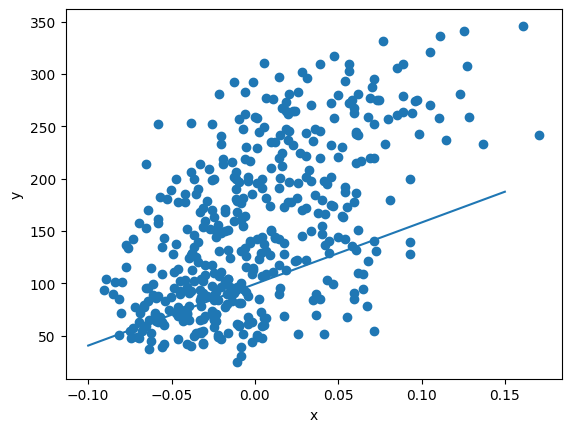

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 여러 에포크 반복
# 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것을 에포크라고 부름
# 일반적으로 수십에서 수천 번의 에포크를 반복

for _ in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


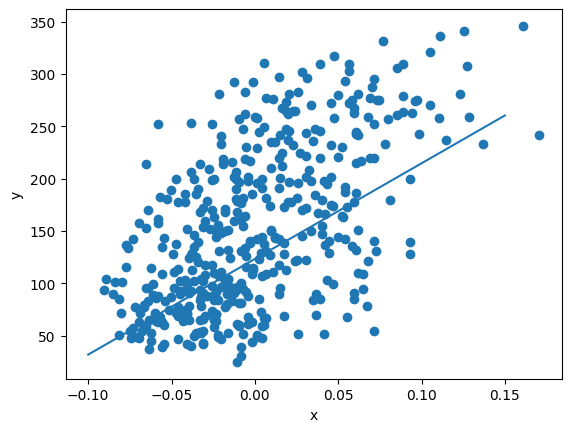

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$\hat{y}=913.6x+123.4$$

In [ ]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
y_pred

np.float64(287.8416643900139)

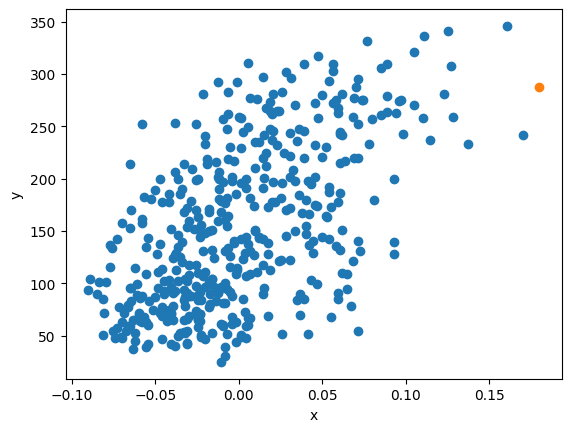

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1]:
# Neuron 클래스
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  # 정방향 계산, 직선 방정식
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

  # 역방향 계산
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

In [5]:
x = diabetes.data[:, 2]
y = diabetes.target

In [6]:
neuron = Neuron()
neuron.fit(x, y)

In [8]:
import matplotlib.pyplot as plt

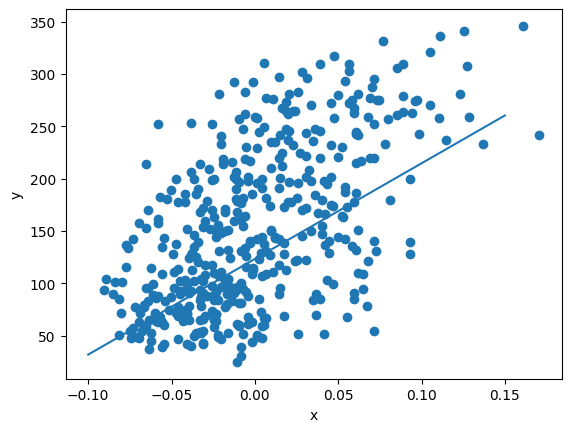

In [9]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()